In [51]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import scipy.optimize as opt

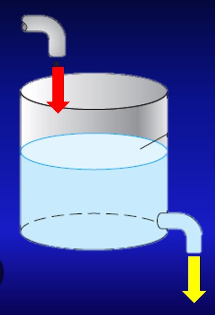

### Datos iniciales de nuestro Tanque
$V = 100L$ (Mezcla de agua y sal)

$x(t) =$ Cantidad de sal en el tiempo t

$x(0) = 1200g$


### Entrada de solución
Al tanque entra una solución de sal de 50$g/l$, a una razón de 3$l/s$

$c_i = 50 g/l$

$r_i = 3 l/s$



### Salida de solución
La solución sale del tanque a una razón de 4$l/s$

$r_o = 4 l/s$

La concentración de salida se calcila de la siguiente manera:

$c_o = \frac{x(t)}{V(t)}$

In [11]:
Vo = 100
x0 = 1200
ci = 50
ri = 3
ro = 4

$V(t) = V_o + t(r_i - r_o)$

### Calcule la cantidad de sal que queda en el tanque después de t segundos

$x' = c_i r_i - r_o \frac{x}{V}$

$x' + x \frac{r_o}{V} = c_i r_i$

In [12]:
def sal(t, x):
    return ci*ri - ro*(x/ volumen(t))

In [79]:
x0 = np.array([1200])
t_span = [0, 100]
sol = solve_ivp(sal, t_span, x0, max_step = 0.01)
sol

C:\Users\kevin\AppData\Local\Temp\ipykernel_4636\453603324.py:2: RuntimeWarning: divide by zero encountered in true_divide
  return ci*ri - ro*(x/ volumen(t))
C:\Users\kevin\anaconda3\lib\site-packages\scipy\integrate\_ivp\rk.py:109: RuntimeWarning: invalid value encountered in true_divide
  return norm(self._estimate_error(K, h) / scale)


  message: 'Required step size is less than spacing between numbers.'
     nfev: 60830
     njev: 0
      nlu: 0
      sol: None
   status: -1
  success: False
        t: array([0.e+00, 1.e-02, 2.e-02, ..., 1.e+02, 1.e+02, 1.e+02])
 t_events: None
        y: array([[1.20000000e+03, 1.20101977e+03, 1.20203909e+03, ...,
        5.26230649e-11, 4.19321000e-11, 3.11410756e-11]])
 y_events: None

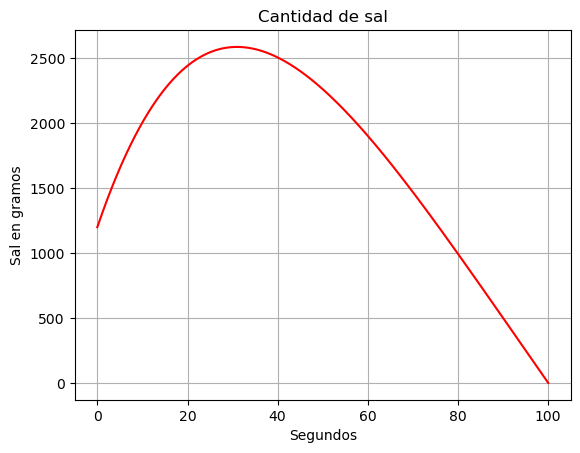

In [80]:
plt.figure()
plt.plot(sol.t, sol.y[0], "r")
plt.xlabel("Segundos")
plt.ylabel("Sal en gramos")
plt.title("Cantidad de sal")
plt.grid()

### USO DEL AJUSTE DE CURVAS PARA EXTRAER LA FUNCIÓN QUE MEJOR DESCRIBE EL COMPORTAMIENTO

In [94]:
x = sol.t
y = sol.y[0]

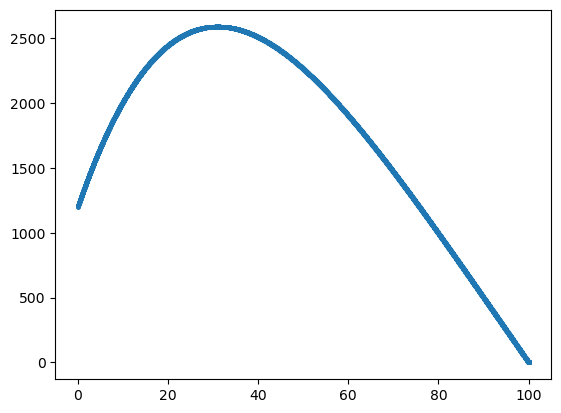

In [97]:
plt.figure()
plt.scatter(x, y, s=5)

In [106]:
def foo(beta, X, y) :
    m, n = X.shape
    beta = np.reshape(beta, [n, 1])
    prediccion = X @ beta
    error = prediccion - y
    return (error.T @ error)[0][0]

In [107]:
m = len(y)
ones = np.ones([m, 1])

x1 = np.reshape(x, [m, 1])
x2 = np.reshape(x**2, [m, 1])
x3 = np.reshape(x**3, [m, 1])
x4 = np.reshape(x**4, [m, 1])

X1 = np.hstack((ones, x1))
X2 = np.hstack((ones, x1, x2))
X3 = np.hstack((ones, x1, x2, x3))
X4 = np.hstack((ones, x1, x2, x3, x4))

beta_inicial1 = np.random.rand(2)
beta_inicial2 = np.random.rand(3)
beta_inicial3 = np.random.rand(4)
beta_inicial4 = np.random.rand(5)

y_vector = np.reshape(y, [m, 1])

In [108]:
sol1 = opt.minimize(foo, beta_inicial1, args=(X1, y_vector))
sol2 = opt.minimize(foo, beta_inicial2, args=(X2, y_vector))
sol3 = opt.minimize(foo, beta_inicial3, args=(X3, y_vector))
sol4 = opt.minimize(foo, beta_inicial4, args=(X4, y_vector))

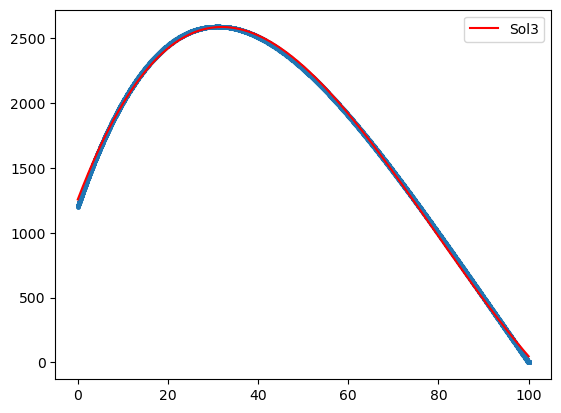

In [109]:
plt.figure()
plt.scatter(x, y, s=5)
#plt.plot(x, X1 @ sol1.x, label = "Sol1") 
#plt.plot(x, X2 @ sol2.x, label = "Sol2")
plt.plot(x, X3 @ sol3.x, "r", label = "Sol3")
#plt.plot(x, X4 @ sol4.x, label = "Sol4")
plt.legend()

In [110]:
sol3.x

array([ 1.25611877e+03,  9.08690086e+01, -1.78327786e+00,  7.53700550e-03])

In [113]:
def funcion(x):
    return sol3.x[0] + sol3.x[1]*x + sol3.x[2]*x**2 + sol3.x[3]*x**3

In [114]:
funcion(0)

1256.1187660316716

### Cuánto tarda en vaciarse el tanque

$V(t) = V_o + t(r_i - r_o)$

In [6]:
def volumen(t):
    return Vo + (t*(ri - ro))

$t = \frac{V(t) - Vo}{r_i - r_o}$

In [7]:
def tiempo(V):
    return (V - Vo)/(ri - ro)

In [8]:
t_vacio = tiempo(0)

In [9]:
t = np.linspace(0, t_vacio, 1000)

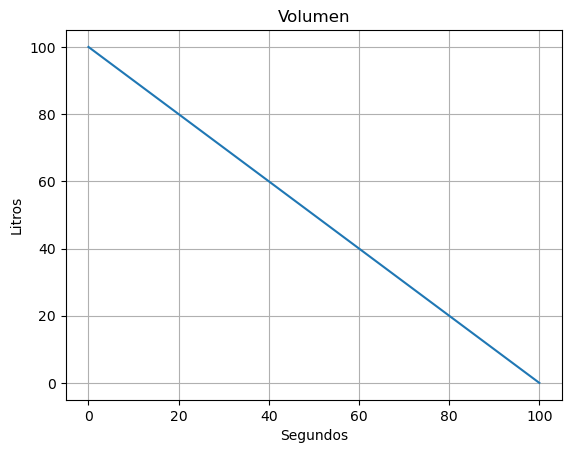

In [10]:
plt.figure()
plt.plot(t, volumen(t))
plt.xlabel("Segundos")
plt.ylabel("Litros")
plt.title("Volumen")
plt.grid()